# Akcje
- wypłaszczyć dane, uogólnić 'test_setup_exception', 'test_exception', 'test_teardown_exception' do jednego pola, i po tym polu filtrować/podsumowywać

In [21]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas import json_normalize
import ipywidgets as widgets
import re
from ipywidgets import interact, interact_manual

In [22]:
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [150]:
url = 'http://rep-portal.wroclaw.nsn-rdnet.net/api/automatic-test/runs/report/powerbi.1646230408210.json?limit=5000&builds__name__pos_neg=SBTS00%2CSBTS22R1%2CSBTS22R2&ordering=-start&qc_test_instance__test_set__name__pos_neg=2175-RB%2C%202175-QB%2C%201085-A%2C%201085-B%2C%201085-C%2C%207883%2C%202640_AD_DRX_MG%2C%205GC002640_B_Multi_UE_support&qc_test_instance__test_object__pos_neg=Regression&test_case__name__name__pos_neg=2175-RB%2C%202175-QB%2C%201085%2C%207883%2C%202640&fields=no,qc_test_set,test_case__name,hyperlink_set__test_logs_url,test_col__name,start,result,test_line,test_col__testline_type,builds,test_col__ute_version,qc_test_instance__organization,qc_test_instance__test_object,qc_test_instance__feature,test_setup_exception,test_setup_exception_message,test_exception,test_exception_message,test_teardown_exception,test_teardown_exception_message,fail_message&powerBIToken=fbe23d8dc34fb99d08fd12de71b5ab0c6fd90afb'
df = get_normalized_json_from_url(url)

In [20]:
with open("data.json") as json_file:
    records = json.load(json_file)['results']
    df = json_normalize(records)

## Helper functions

In [176]:
exception_dict = {
    r'NoRegexpMatch:.*after 10 secs to match regexp \(.*\) in output': "EGATE print did not match",
    r'MibSibAcquisitionFailed': "MIB-SIB Acquisition Failed",
    r'RadioHeadTimeoutException': "RadioHeadTimeoutException",
    r'ParsingFailed:.*syslog': "Cannot find print in syslog",
    r'AdminApiProcedureFailureException': "Admin API exception",
    r'Number of messages \d+ is not.*': "Cannot find print in syslog",
    r'It was not possible to find string.*Established PDU session': "PDU session setup failure",
    r'It was not possible to find string.*Received REGISTRATION COMPLETE': "UE register failure",
    r'UnboundLocalError: local variable.*admin_connection.*referenced before assignment': "Admin API exception",
    r'Value for period \d+ is \d+ but expected is': "PM Counter error",
    r'CounterNotFound': "PM Counter error",
    r'MessageObserverTimeout': "PCAP validation failed",
    r'NoRegexpMatch: Fail regexp found \(.*handover.*performed.*\)': "Handover performed while it should not have been",
    r'No keyword with name': "Test script error",
    r'NoValidConnectionsError:.*192.168.255.1': "Connection to gNB was lost",
    r'AdminApi.*Exception': "Admin API exception",
    r'DTX ratio.*is to.*high': "DTX ratio is to high",
    r'.*is present in SCF. This is unexpected': "Object in SCF is present, while it should not be",
    r'.*is present in SCF, while it should not be': "Object in SCF is present, while it should not be",
    r'.*is not present in SCF': "Object is missing from SCF",
}

def establishing_exception_type(msg):
        lines = msg.split('\n')
        for line in lines:
            for regexp in exception_dict.keys():
                if re.search(regexp, line):
                    return exception_dict[regexp]
        print(msg)
        return lines[0]

def get_normalized_exception_data(df):
    df_temp = df.copy()
    df_temp['exception_type'] = df_temp.apply(lambda value: establishing_exception_type(value.fail_message), axis=1)
    return df_temp

def plot_runs_by_exception_types(df):
    df_temp = get_normalized_exception_data(df)
    df_temp.drop(['fail_message'], axis=1, inplace=True)
    df_temp = df_temp.groupby(['exception_type']).count()['result'].reset_index()
    
    df_temp.sort_values(by=["result"], inplace=True, ignore_index=True)
    df_temp.plot.barh(x="exception_type", figsize=(10,8))
#     display(df_temp)
    
    
def get_normalized_json_from_url(url):
    response = requests.get(url)
    resp_dict = response.json()
    recs = resp_dict['results']
    df = json_normalize(recs)
    return df

In [157]:
df_failed = df[(df['fail_message'] != '') & (df['fail_message'].notnull())]
# df_failed = df[df['fail_message'].notnull()]
display(df_failed)
# df_na.groupby(['test_exception']).count()
# df_na.groupby([df_na.index, 'test_exception']).count()['result']
# df_temp = df.groupby(['fail_message']).count()['result'].reset_index()
# df_temp2 = df.groupby(['test_setup_exception', 'test_exception', 'test_teardown_exception']).count()['result'].reset_index()

# df_sample = df_na.iloc[:3]


# display(df_temp2)
# df_temp.plot.barh(x="fail_message")

result                                   test_line  \
0          not analyzed                    5G_Krakow_UTE5GCLOUDT076   
4          not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1584   
8          not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1584   
10         not analyzed             5G_Paris-Saclay_UTE5GCLASSTL077   
13         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1584   
34         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
38         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
41         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
44         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
45         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
46         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
47         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
48         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
49         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
52         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
55         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
56         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2342   
91         not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1842   
92         not analyzed                 5G_Krakow_UTE5GCLOUDT8SK056   
99         not analyzed                 5G_Krakow_UTE5GCLOUDT8SK056   
100        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1842   
107        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1842   
108        not analyzed                 5G_Krakow_UTE5GCLOUDT8SK056   
118        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
119        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
121        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
122        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
123        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
124        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
125        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
126        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
127        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
128        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
129        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
130        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
131        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
132        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL2075   
133        not analyzed                    5G_Krakow_UTE5GKRK2TL226   
148        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
149        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
154        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
158        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1842   
162        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
165        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
169        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
173   environment issue  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1842   
175        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
180        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
182        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1842   
183        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
185        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
190        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
196        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
203        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1826   
204        not analyzed  MN Trunk Engine_Wroclaw_UTE5GCLASSICAL1842   
209        not analyzed  MN Trunk Engine_

## plot_runs_by_exception_types 

KeyError: 'No match found! Query might be not valid.'
PUCCH format on scells is set(['FOR_SCELL', 'FROM_PUSCH']) instead of FOR_SCELL only
Setup failed:
AttributeError: 'NoneType' object has no attribute 'group'
There are <= 0 (less or equal to 0) NRRELs in SCF
AssertionError
PUCCH format on scells is set(['FOR_SCELL', 'FROM_PUSCH']) instead of FOR_SCELL only
PUCCH format on scells is set(['FOR_SCELL', 'FROM_PUSCH']) instead of FOR_SCELL only
There are <= 0 (less or equal to 0) NRRELs in SCF
There are <= 0 (less or equal to 0) NRRELs in SCF
ngap.PathSwitchRequest_element was not found in gNB tcpdump file
ngap.PathSwitchRequest_element was not found in gNB tcpdump file
ngap.PathSwitchRequest_element was not found in gNB tcpdump file
ngap.PathSwitchRequest_element was not found in gNB tcpdump file
ngap.PathSwitchRequest_element was not found in gNB tcpdump file
ngap.PathSwitchRequest_element was not found in gNB tcpdump file
ngap.PathSwitchRequest_element was not found in gNB tcpdump fil

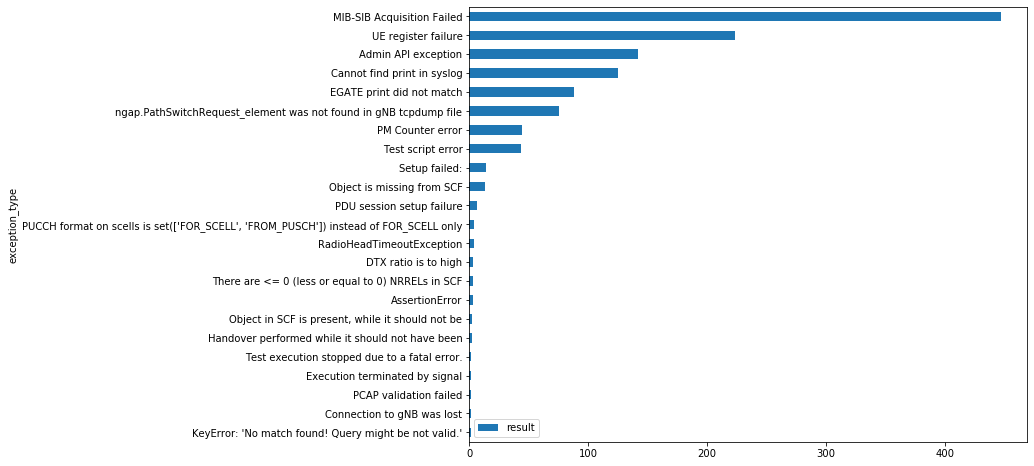

In [177]:
plot_runs_by_exception_types(df_failed)